In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#creates the dataset
#sigma: variance
#seed: seed number for a dataset
def createdata(sigma, seed):
    np.random.seed(seed) #different seeds produces unique datasets

    X1 = np.random.normal(loc=0, scale=1, size=5000)

    X2 = X1 + np.random.normal(loc=0, scale=np.sqrt(sigma), size=5000)
    X3 = X1 + np.random.normal(loc=0, scale=np.sqrt(sigma), size=5000)
    X4 = X1 + np.random.normal(loc=0, scale=np.sqrt(sigma), size=5000)

    df = {'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4}
    train = pd.DataFrame(df)

    i = 3
    a, b, c = 2, 3, 4
    while(i < 30):

        train['X' + str(a + i)] = train['X' + str(a)] + np.random.normal(loc=0, scale=np.sqrt(sigma), size=5000)
        train['X' + str(b + i)] = train['X' + str(b)] + np.random.normal(loc=0, scale=np.sqrt(sigma), size=5000)

        if((c + i) < 30):
            train['X' + str(c + i)] = train['X' + str(c)] + np.random.normal(loc=0, scale=np.sqrt(sigma), size=5000)

        i = i + 3
    
    return train

In [59]:
traindf = createdata(.1, 0)

#new datasets to test robustness
newtrain = createdata(.1, 1)
newtrain2 = createdata(.1, 2)

#datasets to test the effect of sigma
traindf1 = createdata(.5, 0)
traindf2 = createdata(1, 0)
traindf3 = createdata(1.5, 0)

In [7]:
#the activation function for the neural network (tanh)
def activation_function(z):
    return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

In [35]:
def backpropagation(data, k, iterations, alpha):
    #k: denotes the number of nodes in the hidden layer
    #iterations: number of iterations for gradient descent
    #alpha: learning rate
    
    np.random.seed(0)
    inputs = pd.DataFrame()
    for i in range(k): # adjusts the input vector to the right dimensions for matrix multiplication
        inputs[i] = data.copy()
    
    output = data.copy()#output must match the input
    w = np.random.normal(loc=0, scale=.01, size=k)# initialize weights
    
    for t in range(iterations):#gradient descent
        
        hidden = activation_function(np.dot(inputs, w))# hidden layer
        error = output - hidden
        deriv = error * (1 - activation_function(hidden)**2)
        w = w + alpha*(np.dot(inputs.T, deriv))
    
    y_pred = activation_function(np.dot(inputs, w))
    return y_pred
       

In [56]:
#plots the final loss of the neural network for each value of k
def plotloss(train):
    losses = []
    for k in range(1, 31):
        pred_y = backpropagation(train.iloc[0], k, 1000, .00001)
        loss = np.mean(((train.iloc[0] - pred_y)**2)/30)
        losses.append(loss)

    plt.plot(losses)
    plt.title("Plot of Final Loss")
    plt.xlabel("k")
    plt.ylabel("Loss")

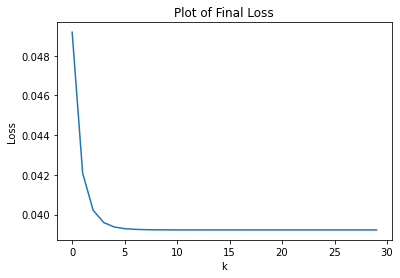

In [57]:
plotloss(traindf)

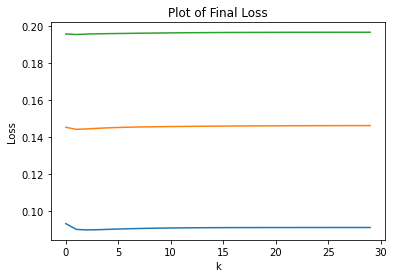

In [55]:
#plot that shows how sigma changes the results
plotloss(traindf1)
plotloss(traindf2)
plotloss(traindf3)

In [11]:
def getPCA(train):
    cov = np.cov(train.T) # covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(cov) # eigenvalues and eigenvectors

    pca1 = np.dot(train, eigenvectors.T[0]) # initialize the pca component matrix
    pca = pd.DataFrame(pca1, columns=['PCA1'])
    for r in range(1, 30):
        pcar = np.dot(train, eigenvectors.T[r])
        pca['PCA' + str(r+1)] = pcar

    return pca

In [12]:
pca1 = getPCA(traindf)
pca1

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA21,PCA22,PCA23,PCA24,PCA25,PCA26,PCA27,PCA28,PCA29,PCA30
0,-10.721610,2.255619,0.736076,0.129338,-0.001957,0.162482,0.036808,-0.184482,-0.332861,-0.454175,...,0.635481,0.107966,-0.572186,-0.246989,-0.323232,0.120989,0.422291,0.103230,0.130132,0.179722
1,-1.962257,0.589316,0.225035,-0.025029,-0.144562,-0.188487,0.071309,-0.020952,-0.180782,-0.346829,...,-0.202097,-0.434790,0.635466,0.107911,-0.046056,0.405014,-0.496006,0.213884,-0.155242,-0.551293
2,-5.213456,-0.457472,-2.878095,-0.063181,-0.043030,-0.020957,-0.099559,-0.420229,-0.418020,0.500492,...,-0.099949,-0.112786,-0.173041,0.029792,-0.338922,-0.256560,-0.038665,0.329801,-0.387095,0.086113
3,-12.410974,0.487752,-0.459585,-0.064920,-0.016869,-0.040188,0.040981,-0.172574,-0.148559,-0.159456,...,-0.033558,0.421291,0.155996,-0.674831,-0.147827,0.344265,-0.656787,-0.041171,-0.117987,-0.327305
4,-9.030178,1.160963,-0.906876,-0.321914,-0.056741,0.084160,0.025988,-0.128373,-0.234916,-0.153504,...,0.228991,0.415003,-0.035324,0.270177,-0.236016,0.670050,-0.402374,-0.226245,0.055974,0.444267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.083861,1.363022,-1.307676,-0.082407,0.145086,0.050914,0.162258,-0.042131,-0.431036,-0.136550,...,0.495269,0.287974,0.098972,0.288824,0.029987,-0.037280,-0.065373,0.394156,0.016485,-0.560098
4996,-5.113254,-0.974403,-1.290104,0.125376,-0.050618,0.027500,0.032313,0.273172,-0.005102,0.226530,...,0.278778,0.031836,-0.563813,-0.412009,0.553424,0.405665,0.242968,0.288307,0.365741,0.414825
4997,-6.011068,-1.046622,0.084096,0.127182,-0.127312,-0.053873,0.108495,0.654506,-0.419861,-0.350601,...,-0.189016,0.404155,0.192774,-0.426054,0.611062,-0.099017,-0.179639,0.232625,-0.069823,0.543904
4998,-0.326254,-0.321511,0.180727,-0.159443,0.125372,-0.007675,-0.050810,-0.052136,-0.123111,0.096666,...,-0.064149,0.120682,0.136357,0.187368,-0.197921,-0.641336,-0.122744,0.059898,-0.140581,-0.343487


In [47]:
#test for robustness
pca2 = getPCA(newtrain)
pca3 = getPCA(newtrain2)

print(pca2)
print(pca3)

           PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0     -9.210560  0.281929  1.520417  0.069917 -0.162769  0.121778 -0.020788   
1      3.143384 -0.630017 -1.368170  0.048860 -0.058257 -0.031777  0.001445   
2      2.741550  1.003421  1.516163  0.085407 -0.092411  0.068745  0.186747   
3      6.096911  0.444964  1.967286 -0.004869  0.032315 -0.092309  0.150280   
4     -4.546017 -0.349398 -1.542859 -0.071856  0.133589  0.075248  0.115698   
...         ...       ...       ...       ...       ...       ...       ...   
4995  -8.062867 -0.783635 -0.708409 -0.172705 -0.024417  0.071699 -0.098940   
4996  -5.061279  1.069091 -0.763350  0.320989  0.127476  0.037430 -0.047392   
4997   4.156713  0.266394  2.273265  0.046041  0.182548  0.005553 -0.001694   
4998  -7.303021  0.725331  0.392556  0.241477 -0.015524  0.089506  0.038336   
4999 -11.019917  0.868704  0.995185 -0.303085 -0.062646 -0.052068 -0.021976   

          PCA8      PCA9     PCA10  ...     PCA21  

In [48]:
#show how sigma affects the PCA results
pcasigma1 = getPCA(traindf2)# sigma = 1
pcasigma2 = getPCA(traindf3)# sigma = 1.5

print(pcasigma1)
print(pcasigma2)

           PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0     12.924404 -7.287991  2.343683  0.031538 -0.011227 -0.489629  0.127970   
1      1.430688 -1.875854  0.718508  0.124754  0.464131  0.597215  0.218545   
2      4.883540  1.373461 -9.099546  0.346875  0.127651  0.076295 -0.312214   
3     12.672414 -1.692173 -1.441901  0.560351  0.040051  0.159457  0.136292   
4      6.344069 -3.737024 -2.845260  1.145872  0.157867 -0.234824  0.092359   
...         ...       ...       ...       ...       ...       ...       ...   
4995  -2.303901 -4.287314 -4.123291  0.166996 -0.458856 -0.149377  0.516665   
4996   7.392065  2.976226 -4.089352 -0.185998  0.156621 -0.081119  0.104397   
4997   8.074977  3.207360  0.257097 -0.164399  0.403122  0.177121  0.341984   
4998  -1.683630  1.047159  0.575917  0.393292 -0.399615  0.032122 -0.158326   
4999   3.587374  2.522158  3.058524 -0.054574  0.048331 -0.072312 -0.157803   

          PCA8      PCA9     PCA10  ...     PCA21  

In [51]:
#creates the dependency graph for Xi by grabbing its two highest correlated variables
#Note that this function doesn't return anything, it only prints the most significant predictors for each Xi variable so that 
#the dependency graph can be created (dependency graphs can be found in the zip file)
def dependencygraph(data, features):
    for i in data:
        print("Xi: "+ i)
        model = data.copy()
        model = model.drop([i], axis=1)    
        k = 0
        while(k < features):
            maxcor = 0
            x = ''
            for j in model:
                r = np.corrcoef(data[i], model[j])            
                if((abs(r[0, 1]) > maxcor) & (i != j)):
                    maxcor = abs(r[0, 1])
                    x = j
            print(x)
            model = model.drop([x], axis=1)
            k = k + 1
        

In [52]:
#creates the dependency graph for Xi by grabbing the predictors with weights larger than a threshold
#Note that this function doesn't return anything, it only prints the Xi variables larger than the threshold so that the
#dependency graph can be created (dependency graphs can be found in the zip file)
def thresholdgraph(data, threshold):
    for i in data:
        print("Xi: "+ i)
        model = data.copy()
        model = model.drop([i], axis=1)
        w = np.linalg.inv(model.T.dot(model) + .75*np.identity(29)).dot(model.T).dot(data[i])
        
        newWeights = []
        for j in range(len(w)):
            if(abs(w[j]) > threshold):
                print(model.columns[j])
                newWeights.append(w[j])
        print(newWeights)
        

In [53]:
dependencygraph(traindf, 2)

Xi: X1
X2
X4
Xi: X2
X29
X23
Xi: X3
X9
X21
Xi: X4
X13
X16
Xi: X5
X2
X23
Xi: X6
X3
X24
Xi: X7
X4
X13
Xi: X8
X2
X29
Xi: X9
X3
X15
Xi: X10
X4
X13
Xi: X11
X2
X29
Xi: X12
X3
X18
Xi: X13
X4
X10
Xi: X14
X2
X26
Xi: X15
X3
X9
Xi: X16
X4
X19
Xi: X17
X2
X23
Xi: X18
X3
X12
Xi: X19
X4
X22
Xi: X20
X2
X29
Xi: X21
X3
X9
Xi: X22
X4
X19
Xi: X23
X2
X29
Xi: X24
X3
X18
Xi: X25
X4
X10
Xi: X26
X2
X23
Xi: X27
X3
X15
Xi: X28
X4
X13
Xi: X29
X2
X11
Xi: X30
X3
X18


In [54]:
thresholdgraph(traindf, .05)

Xi: X1
X2
X3
X4
[0.3518884568593512, 0.3358634672820112, 0.33990368957493333]
Xi: X2
X1
X5
X8
X11
X14
X17
X20
X23
X26
X29
[0.11374584782338483, 0.09963282119398356, 0.1039280563487381, 0.09808787417440348, 0.09319479473812733, 0.10225664523132429, 0.10114070225381791, 0.09230763875723888, 0.10115846069019557, 0.10575286705117198]
Xi: X3
X1
X6
X9
X12
X15
X18
X21
X24
X27
X30
[0.10565519630524256, 0.10413040065311437, 0.10222269401621098, 0.09436278407394108, 0.10608666272733912, 0.0890940803356062, 0.10485249796874017, 0.10261014221794991, 0.09521462077881246, 0.10073885431632278]
Xi: X4
X1
X7
X10
X13
X16
X19
X22
X25
X28
[0.12202524247371799, 0.11069573470583274, 0.10553449812807339, 0.11856776969611824, 0.1158934817274078, 0.108502086620868, 0.10894461510860148, 0.10582302399228316, 0.11112161191516437]
Xi: X5
X2
[0.9657142220893441]
Xi: X6
X3
[1.056354908848773]
Xi: X7
X4
[1.0023549643287575]
Xi: X8
X2
X4
[1.0332768995866481, 0.08346121184810551]
Xi: X9
X3
[1.012350549452031]
Xi: X10
X

In [61]:
#sigma does not have an effect on the threshold graph, results are the same
thresholdgraph(traindf3, .05) #sigma = 1.5

Xi: X1
X2
X3
X4
[0.2400750956888554, 0.23732287499248422, 0.24502701950098635]
Xi: X2
X1
X5
X8
X11
X14
X17
X20
X23
X26
X29
[0.11185971792603225, 0.09962910136981229, 0.10393703179543737, 0.09808635147242167, 0.09318124296709307, 0.10225287202908902, 0.10114099253113842, 0.09229218713502763, 0.10116287538971767, 0.1057583144636475]
Xi: X3
X1
X6
X9
X12
X15
X18
X21
X24
X27
X30
[0.10756946412118673, 0.10413675591528143, 0.10222385724107756, 0.09435068205285971, 0.1060947198955324, 0.08907589405957358, 0.10485875755404836, 0.10261531004922544, 0.09520384037124399, 0.10074498528338748]
Xi: X4
X1
X7
X10
X13
X16
X19
X22
X25
X28
[0.12697361978185048, 0.11069240408594108, 0.10552277553625933, 0.11857853299788908, 0.11589858984837745, 0.10849704526857112, 0.10894404924559228, 0.10581647967739469, 0.11111522454244649]
Xi: X5
X2
[0.9778875900535164]
Xi: X6
X3
[1.069980180959734]
Xi: X7
X4
[1.0135688710839408]
Xi: X8
X2
X4
[1.046292910736684, 0.0848412841587736]
Xi: X9
X3
[1.025420275204609]
Xi: X10